## Main Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mis
import os

from sklearn.model_selection import train_test_split

##for shuffle the Datasets
from sklearn.utils import shuffle

## metric
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , mean_squared_error

## preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score , cross_val_predict , GridSearchCV


## Ensemble
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgp


# ANN Neural Network
from keras import layers , Sequential 
from tensorflow.keras.layers import Dense

# Features:

# age: Age of the patient in years (numerical).
# sex: Sex of the patient (1 = male, 0 = female, categorical).
# cp: Chest pain type (4 values, likely categorical).
# trestbps: Resting blood pressure (in mm Hg, numerical).
# chol: Serum cholesterol in mg/dl (numerical).
# fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false, numerical, could be treated as categorical).
# restecg: Resting electrocardiographic results (values 0, 1, 2, likely categorical).
# thalach: Maximum heart rate achieved (numerical).
# exang: Exercise-induced angina (1 = yes, 0 = no, numerical, could be treated as categorical).
# oldpeak: ST depression induced by exercise relative to rest (numerical).
# slope: The slope of the peak exercise ST segment (values 1, 2, 3, likely categorical).
# ca: Number of major vessels (0-3) colored by fluoroscopy (numerical).
# thal: Thalium stress test result (3 values, likely categorical).
# target: Presence of heart disease (1 = yes, 0 = no, numerical, target variable).


## Load Data

In [2]:
path_file = r"/kaggle/input/datasets-heart-disease/heart_disease_data.csv"

if os.path.exists(path_file):
    df = pd.read_csv(path_file)
    print(df.head())
    
else:
    print("Soory , your file not exist.")

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
pd.DataFrame(df.columns)

,0
0,age
1,sex
2,cp
3,trestbps
4,chol
5,fbs
6,restecg
7,thalach
8,exang
9,oldpeak


In [6]:
pd.DataFrame(df.nunique())

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [7]:
# detalis for datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# some statistcs
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## check Nan

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Show Nan in gragh

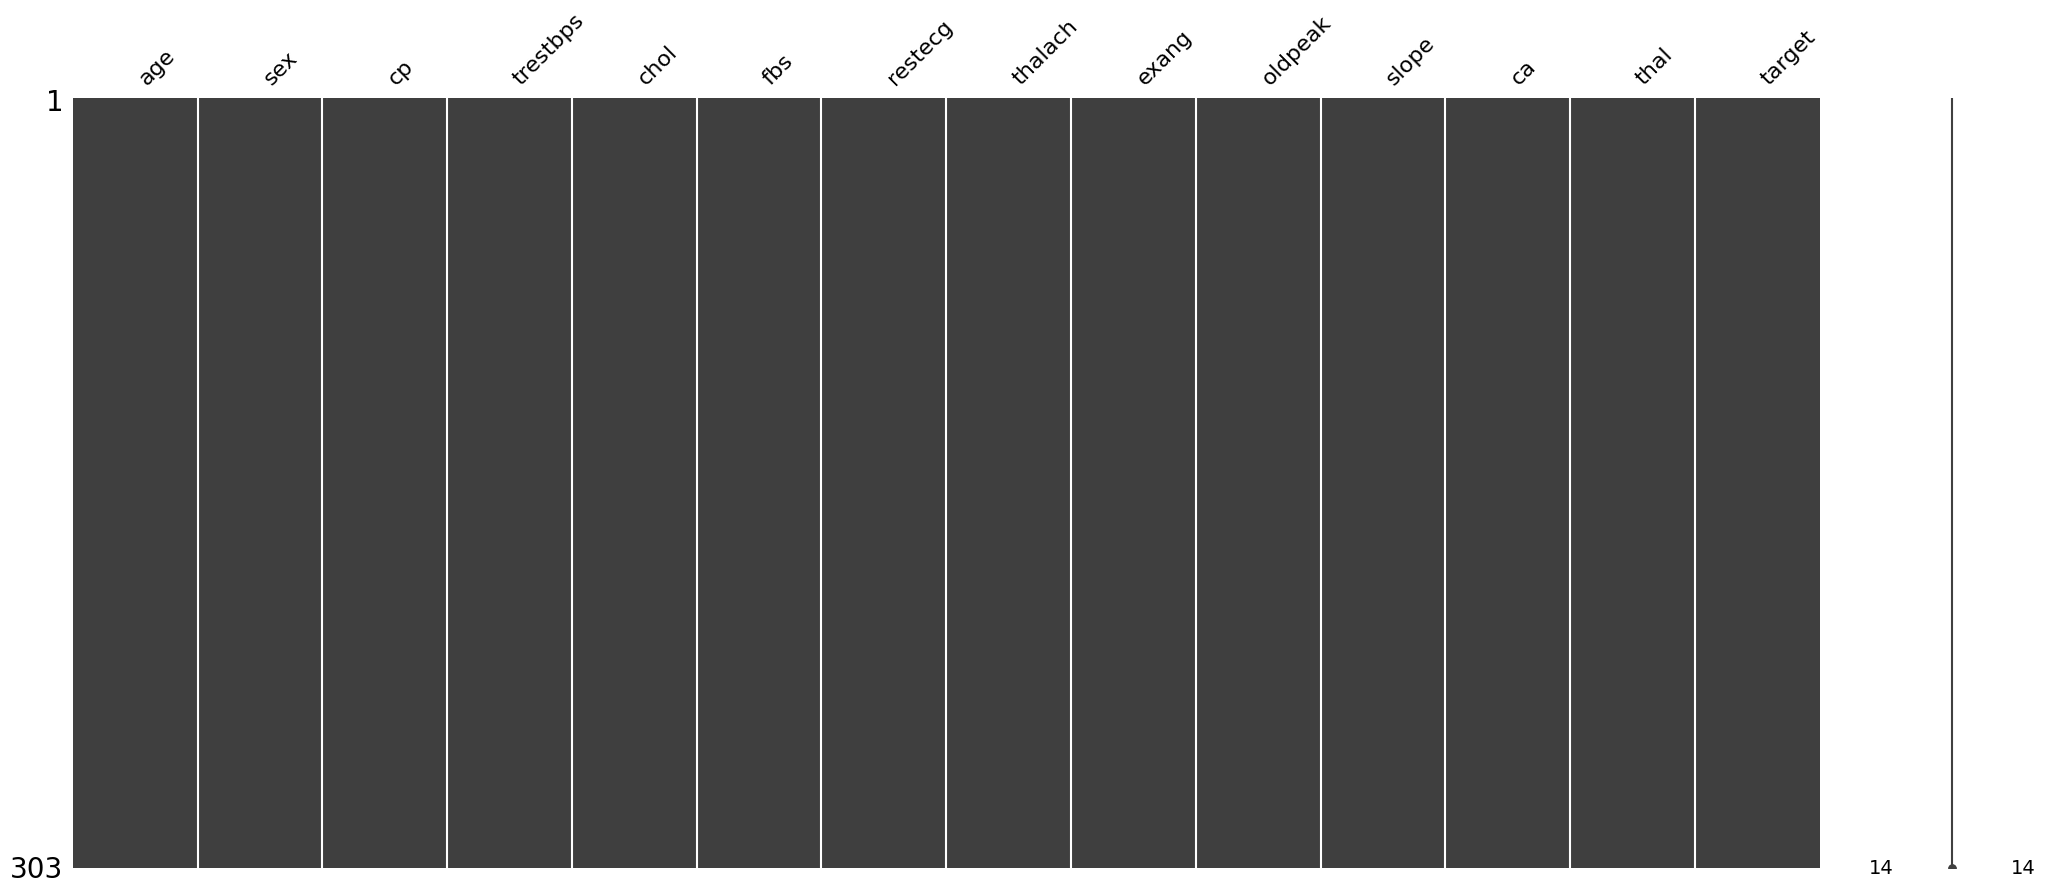

In [10]:
mis.matrix(df)
plt.show()

# Data Pre-Processing

In [11]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

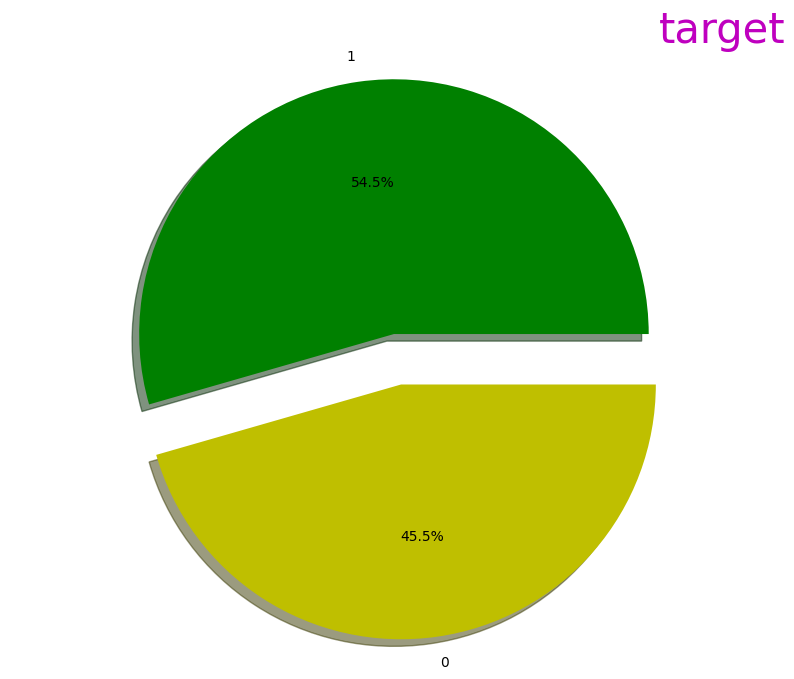

In [12]:
plt.figure(figsize=(10,8))
plt.pie([165 , 138] , labels=["1" , "0"] , colors=["g" , "y"] , explode=[0.1 , 0.1] , autopct="%1.1f%%" ,shadow=True )
plt.axis("equal")
plt.title("target" , fontsize=30 , loc="right" , c="m")
plt.show()

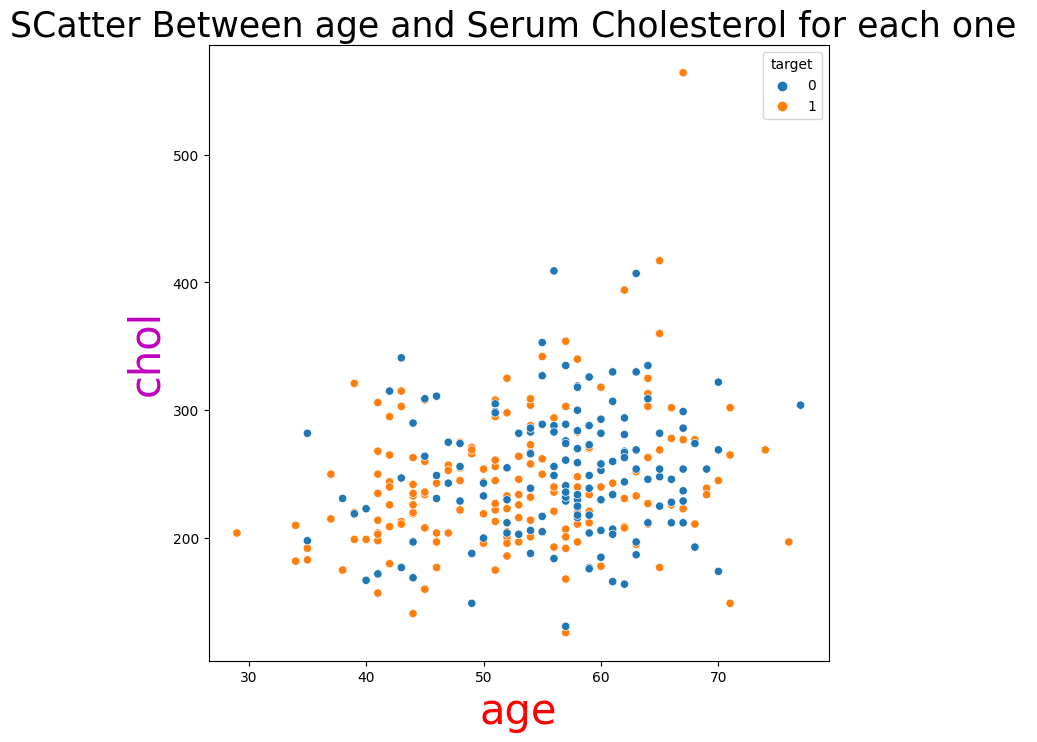

In [13]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df ,x=df["age"] , y=df["chol"] , hue="target")
plt.title("SCatter Between age and Serum Cholesterol for each one " , fontsize=25)
plt.xlabel("age" , fontsize=30 , color="r")
plt.ylabel("chol" , fontsize=30 , color="m")
plt.show()

## Chest Pain Type: Type of chest pain experienced (1 for typical angina, 2 for atypical angina, 3 for non-anginal pain, 4 for asymptomatic).

In [14]:
df["cp"].nunique()

4

In [15]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

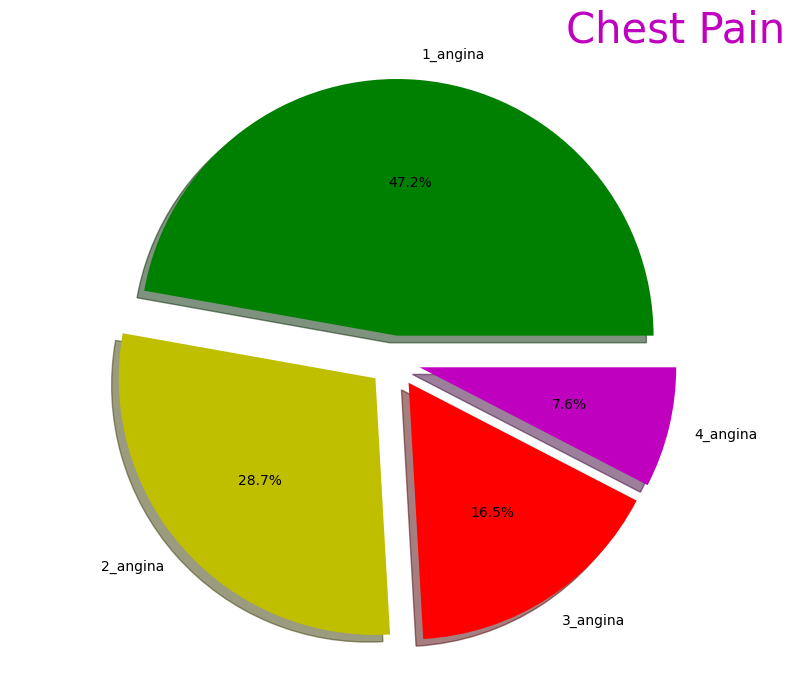

In [16]:
plt.figure(figsize=(10,8))

plt.pie([143 , 87 , 50 , 23] , labels=["1_angina" , "2_angina" , "3_angina" , "4_angina"] , shadow=True ,colors=["g" , "y" , "r" , "m"] ,
        explode=[0.1 , 0.1 , 0.1 , 0.1] , autopct="%1.1f%%")

plt.axis("equal")
plt.title("Chest Pain" , fontsize=30 , loc="right" , c="m")
plt.show()

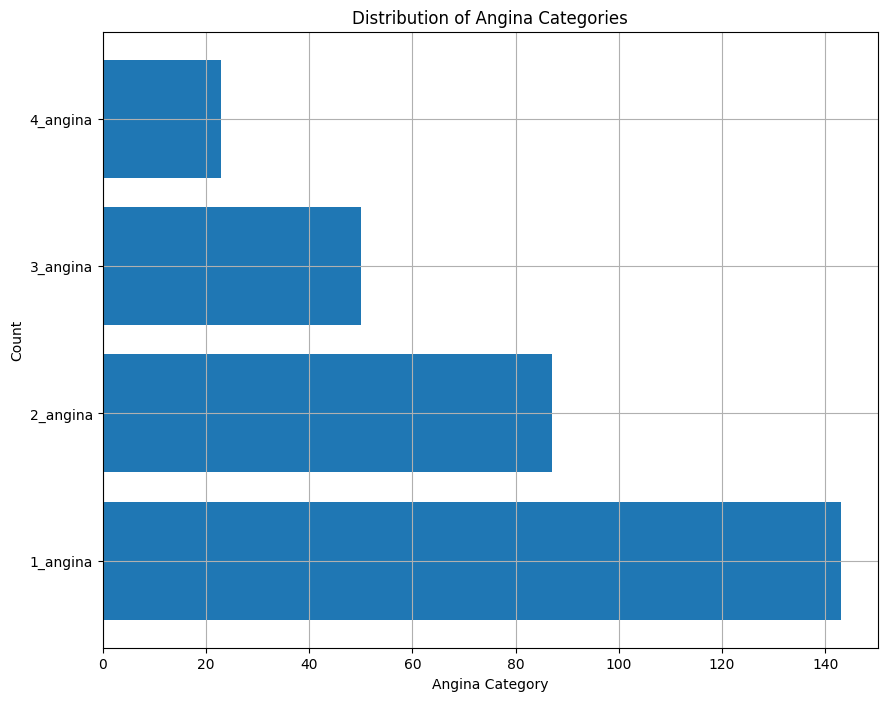

In [17]:
plt.figure(figsize=(10,8))
angina_counts = [143, 87, 50, 23]
labels = ["1_angina", "2_angina", "3_angina", "4_angina"]

plt.barh(labels, angina_counts)
plt.xlabel("Angina Category")
plt.ylabel("Count")
plt.title("Distribution of Angina Categories")
plt.grid(True)
plt.show()


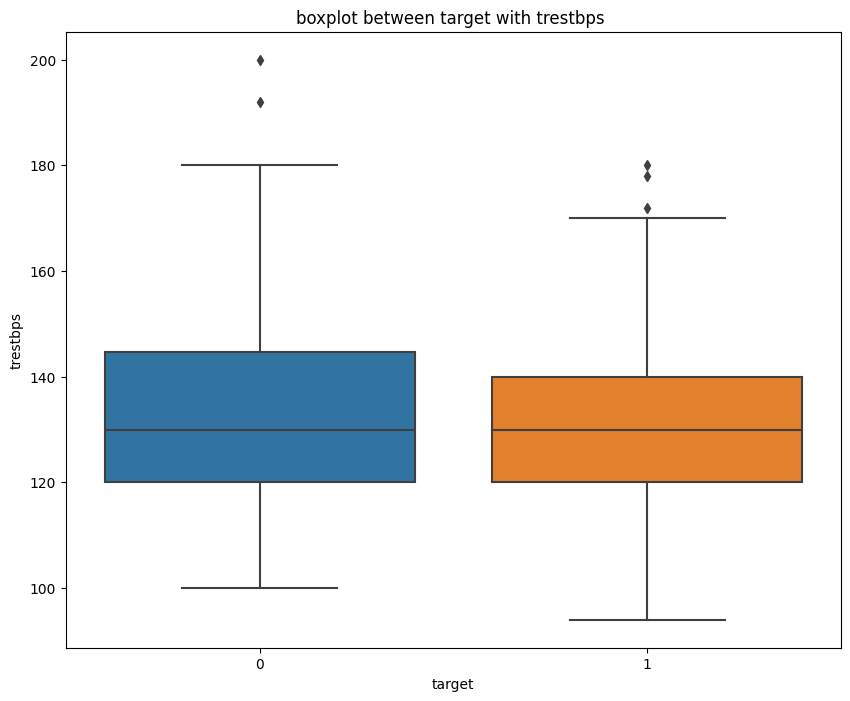

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df , x=df["target"] , y=df["trestbps"])
plt.xlabel("target")
plt.ylabel("trestbps")
plt.title("boxplot between target with trestbps ")
plt.show()

## Electrocardiogram Result: Result of the resting electrocardiogram test (0 for normal, 1 for ST-T wave abnormality, 2 for T wave inversion).

In [19]:
df["restecg"].value_counts()

restecg
1    152
0    147
2      4
Name: count, dtype: int64

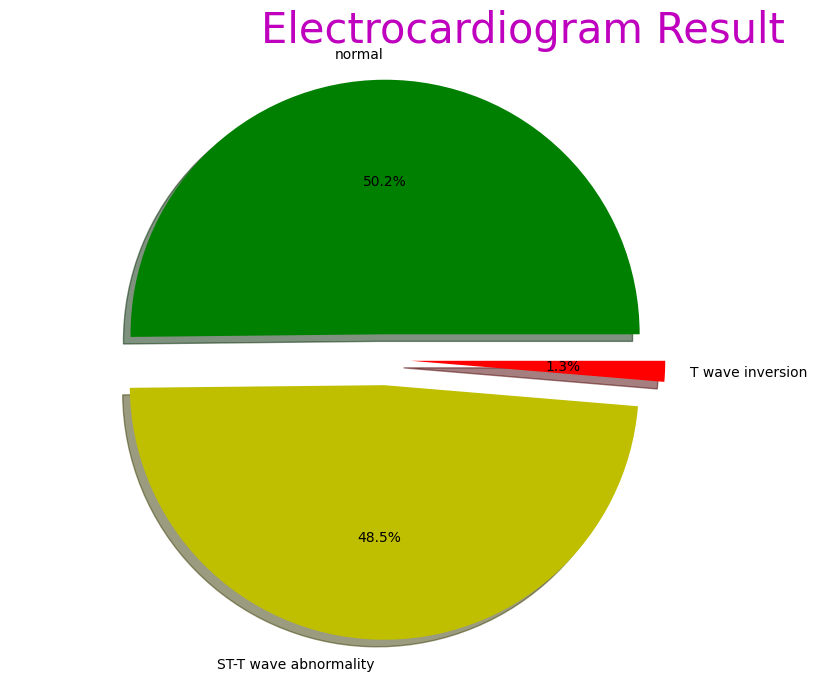

In [20]:
plt.figure(figsize=(10,8))

plt.pie([152 , 147 , 4 ] , labels=["normal" , "ST-T wave abnormality" , "T wave inversion"] , shadow=True ,colors=["g" , "y" , "r"] ,
        explode=[0.1 , 0.1 , 0.1] , autopct="%1.1f%%")

plt.axis("equal")
plt.title("Electrocardiogram Result" , fontsize=30 , loc="right" , c="m")
plt.show()

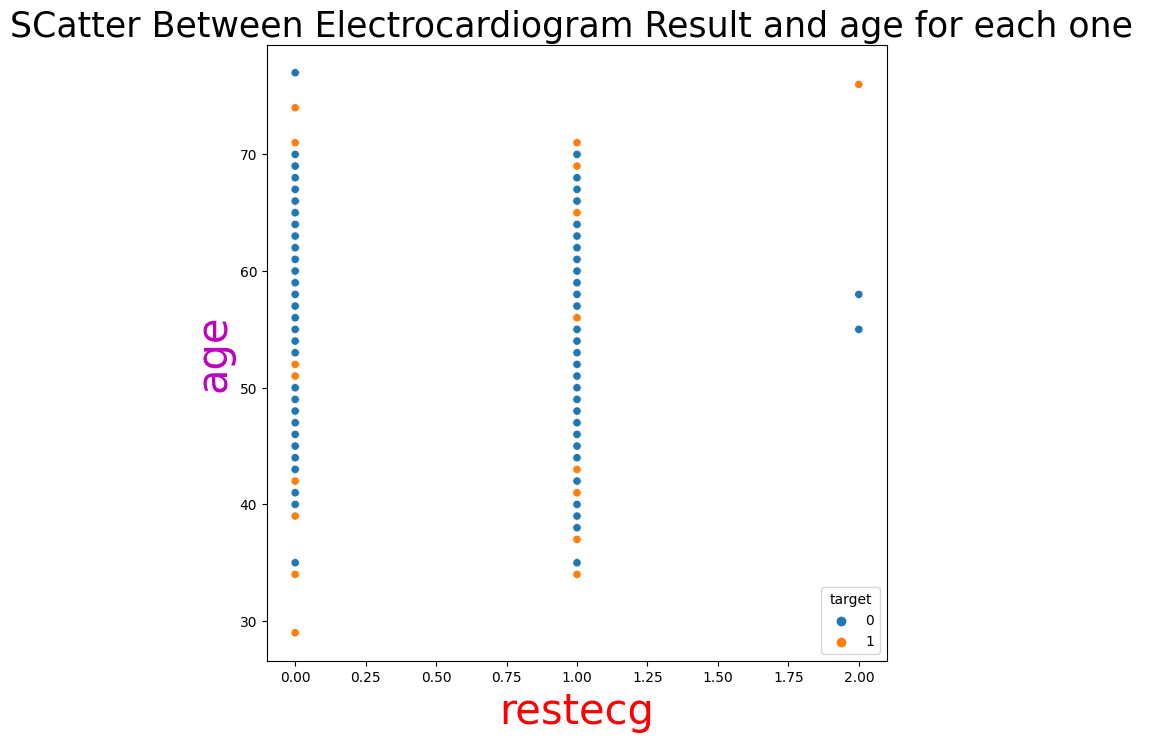

In [21]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df ,x=df["restecg"] , y=df["age"] ,hue="target")
plt.title("SCatter Between Electrocardiogram Result and age for each one " , fontsize=25)
plt.xlabel("restecg" , fontsize=30 , color="r")
plt.ylabel("age" , fontsize=30 , color="m")
plt.show()

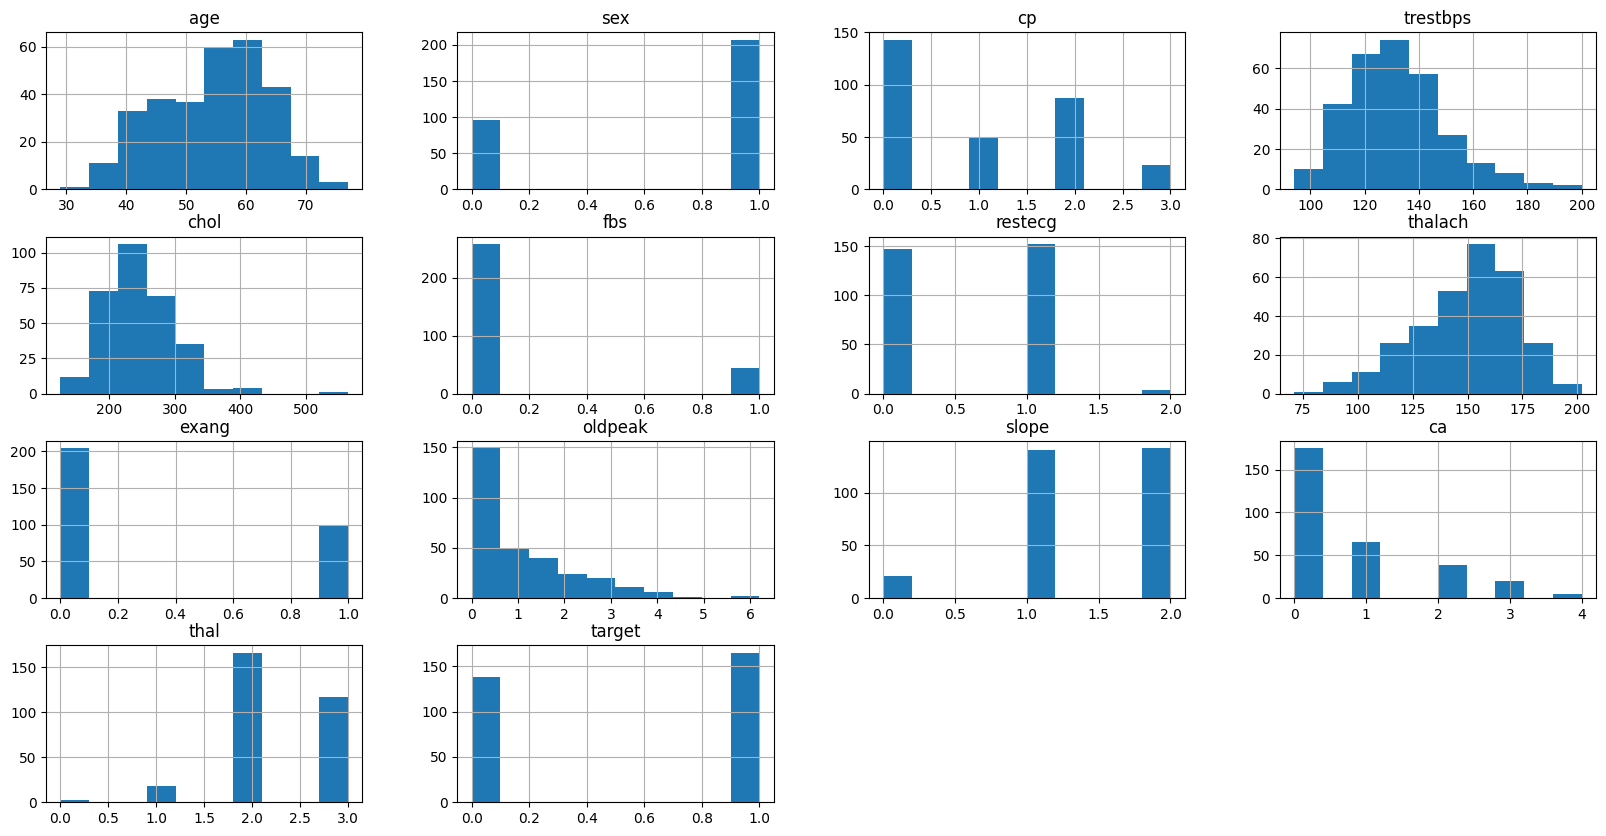

In [22]:
### histogram
df.hist( figsize=(20,10))
plt.show()

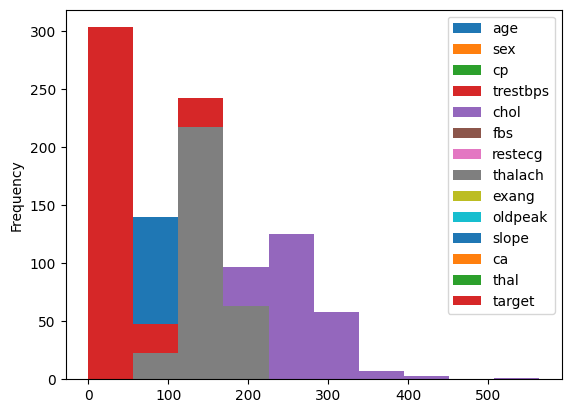

In [23]:
df.plot(kind="hist")
plt.show()

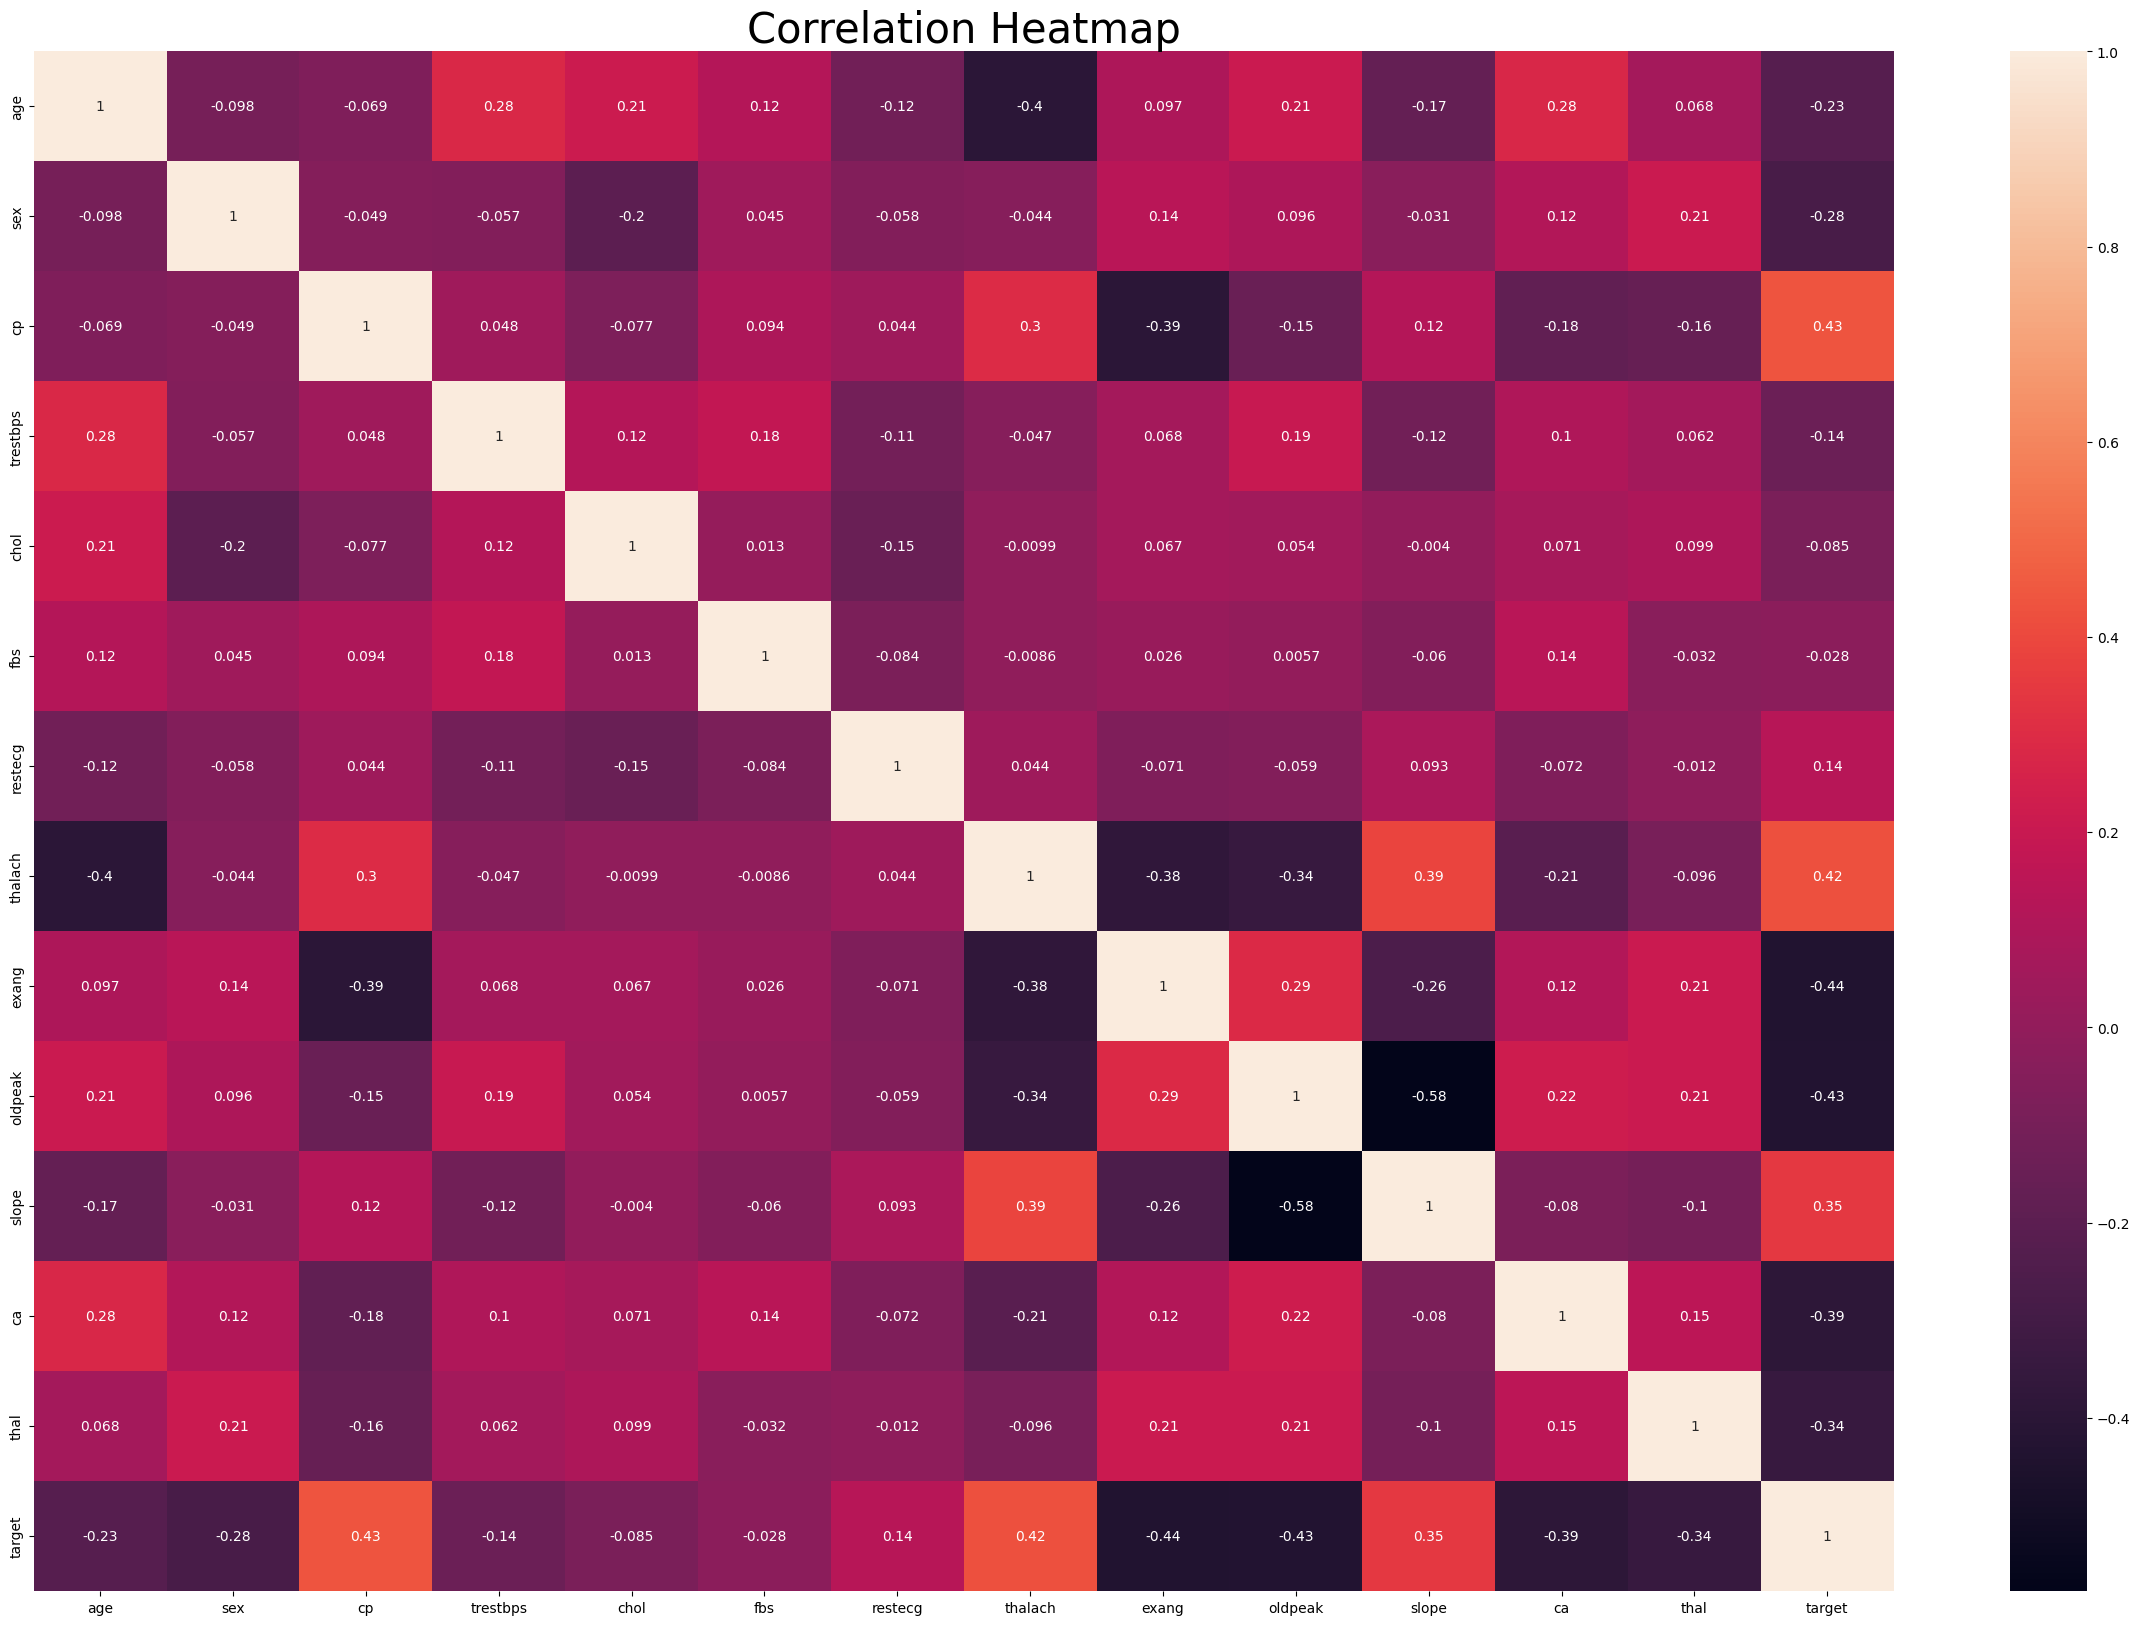

In [24]:
plt.figure(figsize=(30,20))
sns.heatmap(data=df.corr() , annot=True  , cbar=True)
plt.title("Correlation Heatmap" , fontsize=30 )
plt.show()

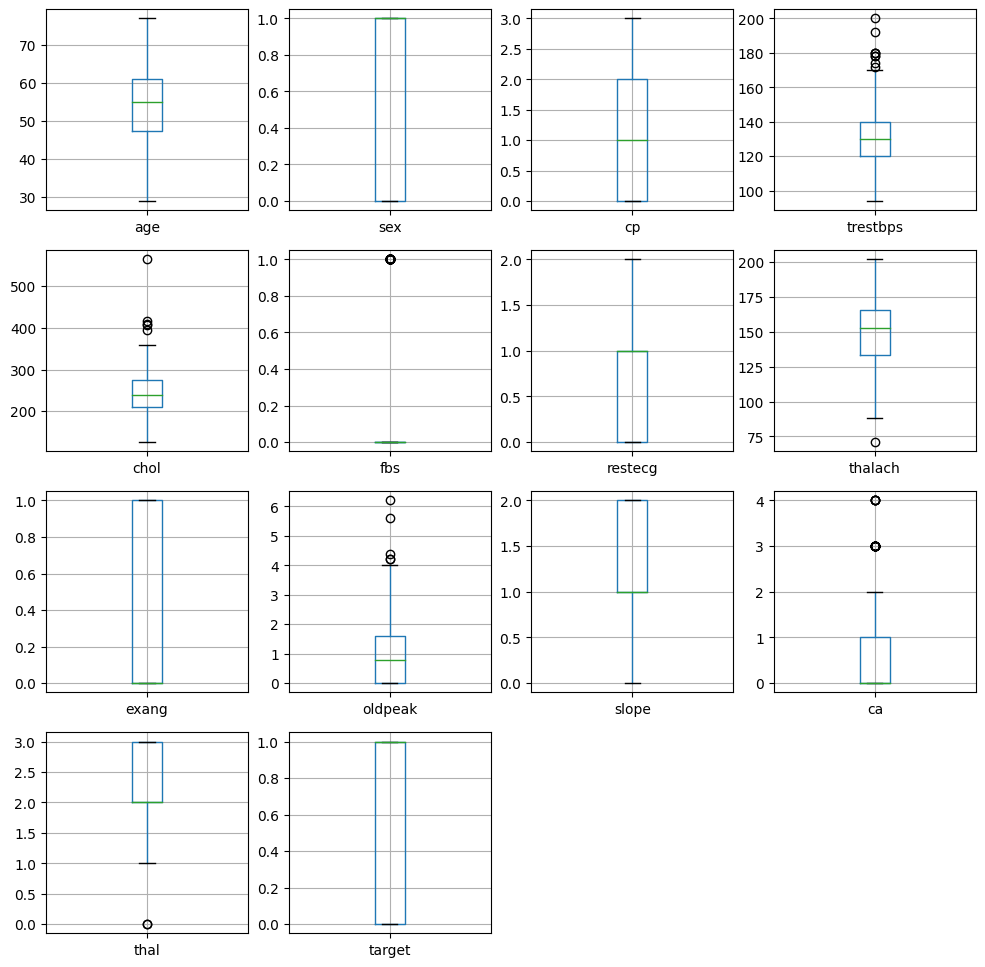

In [25]:
## Checking outliers in the graph
plt.figure(figsize=(12,12))
i=1
for col in df.columns:
    plt.subplot(4,4,i)
    df[[col]].boxplot()
    i+=1

In [26]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

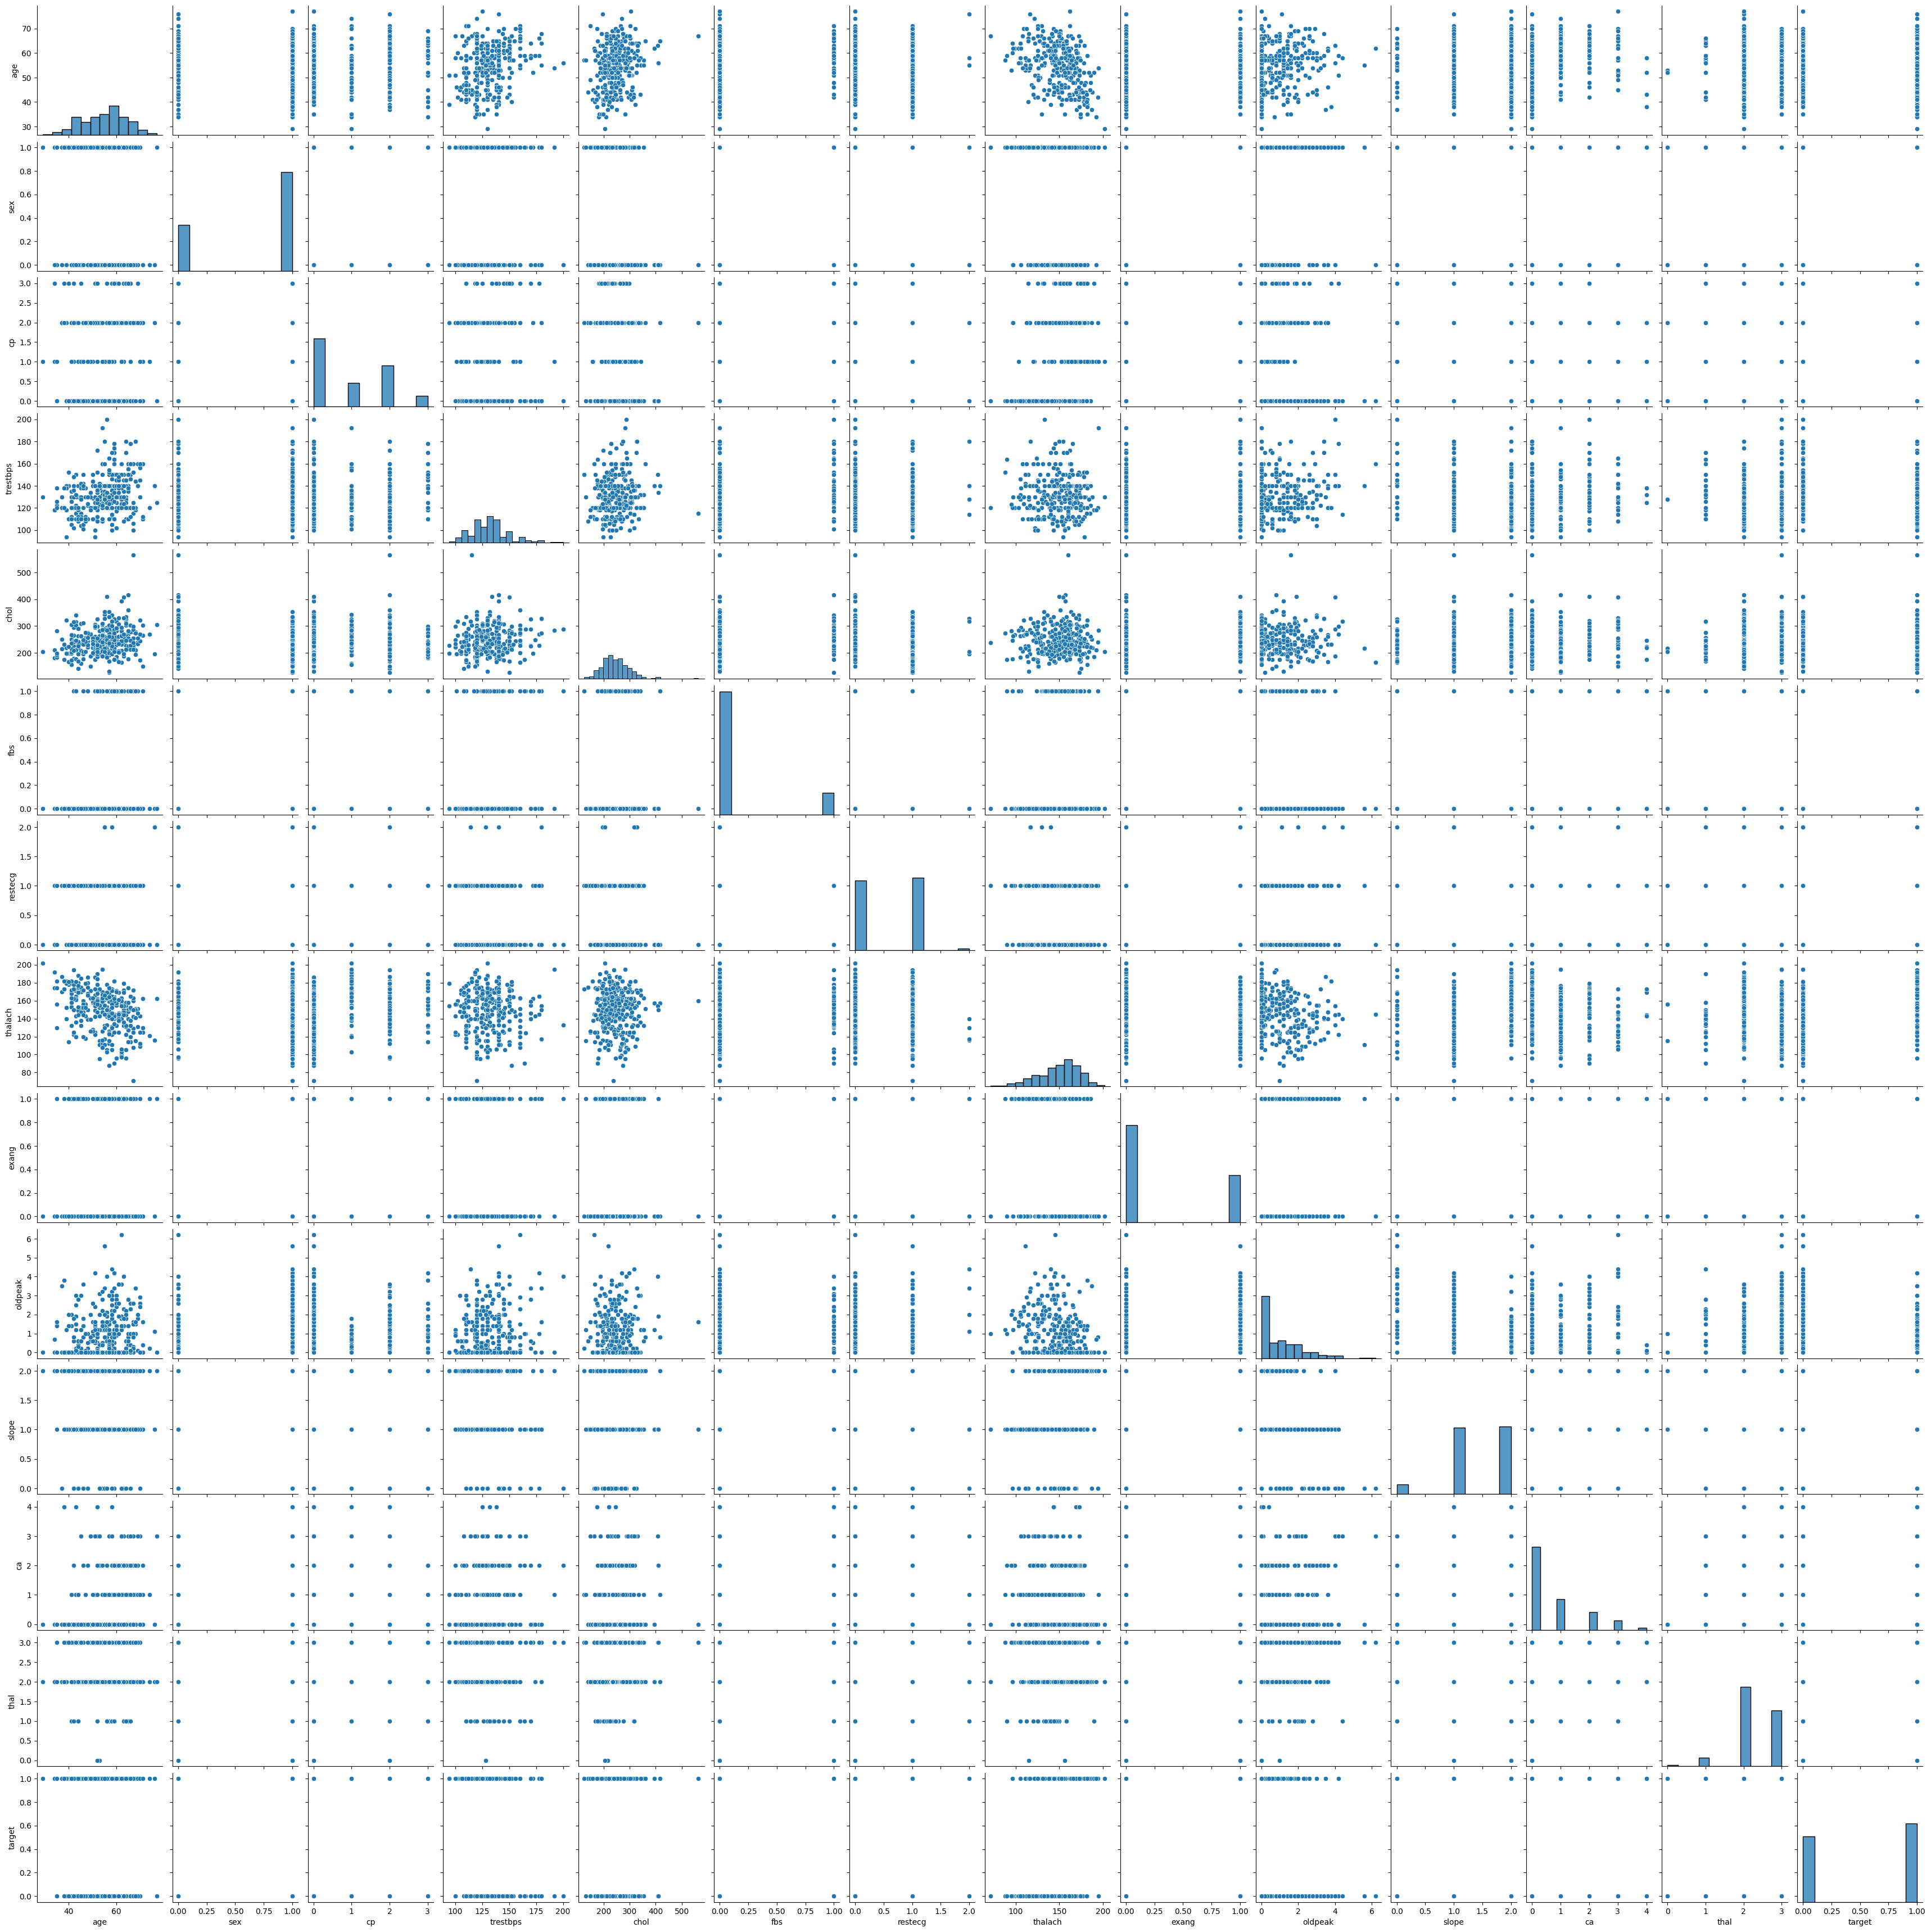

In [27]:
sns.pairplot(df)

In [38]:
numeric_cols = [col for col in df.columns if df[col].dtype in  ["int32" , "int64" , "float32" , "float64"]]
numeric_cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

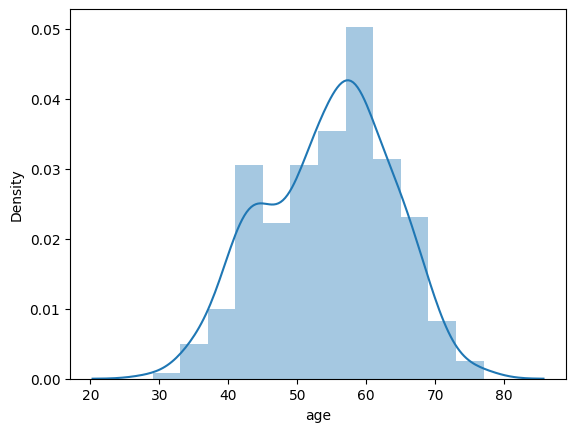

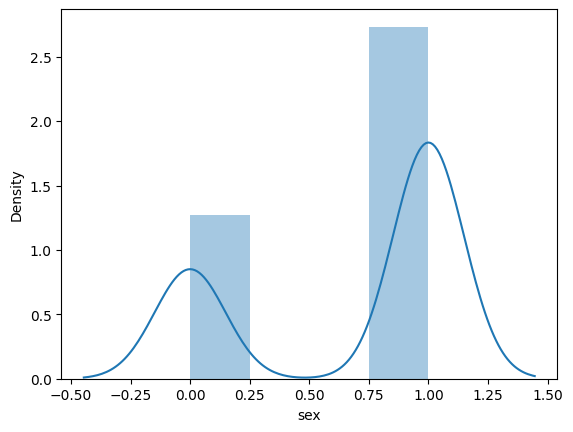

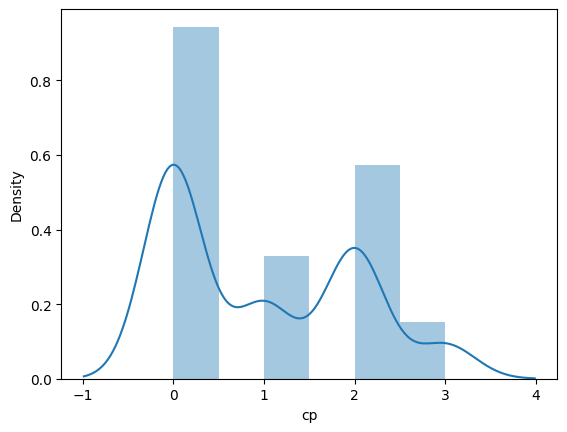

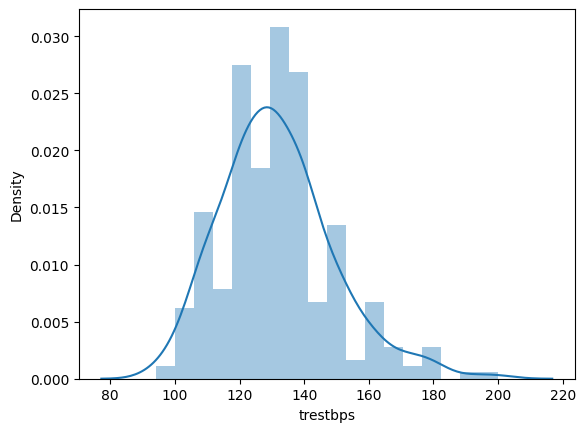

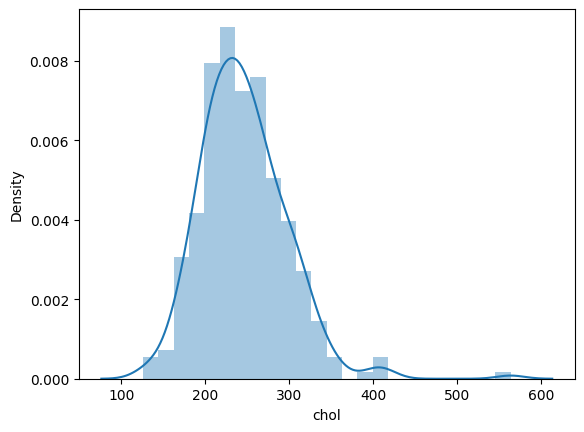

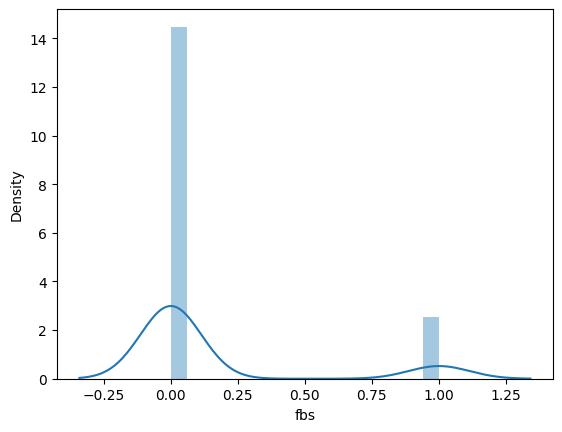

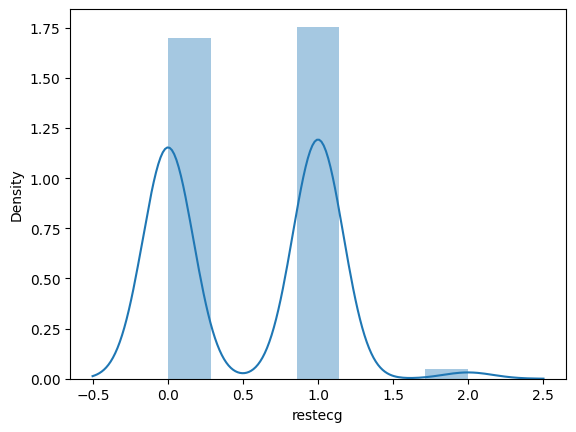

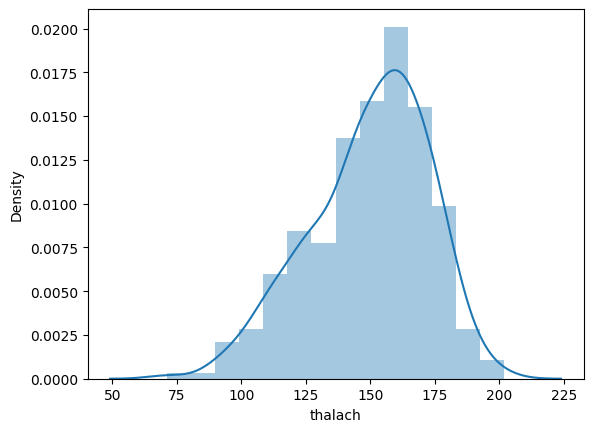

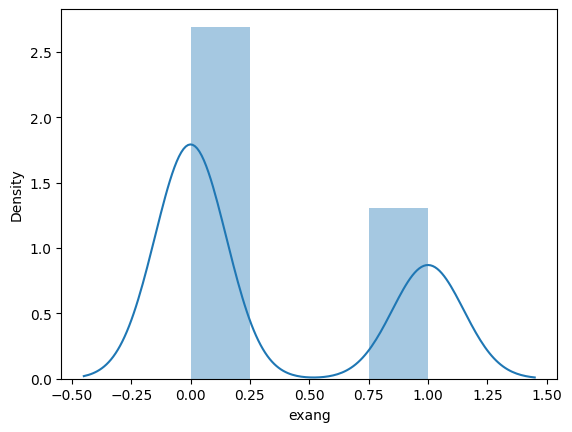

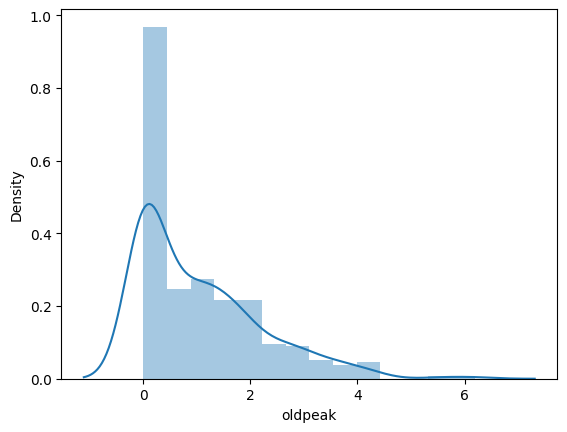

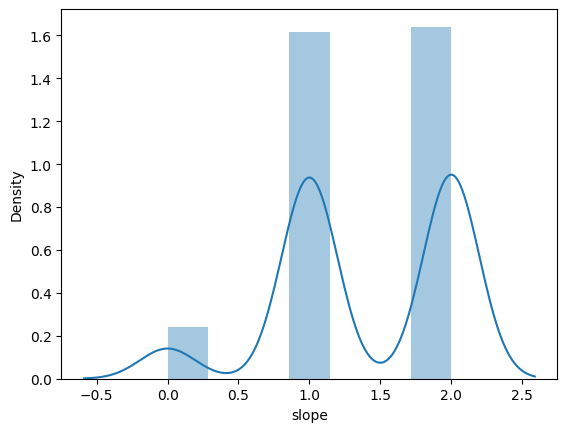

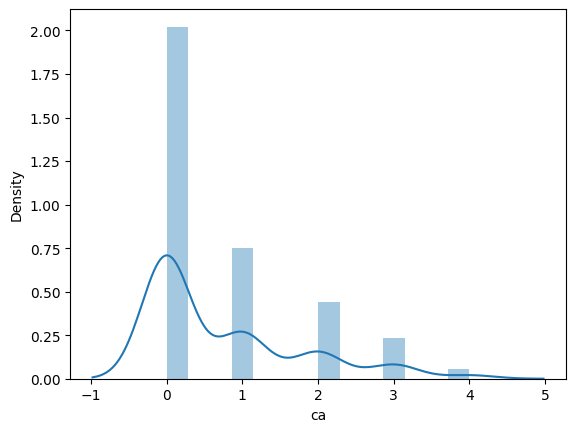

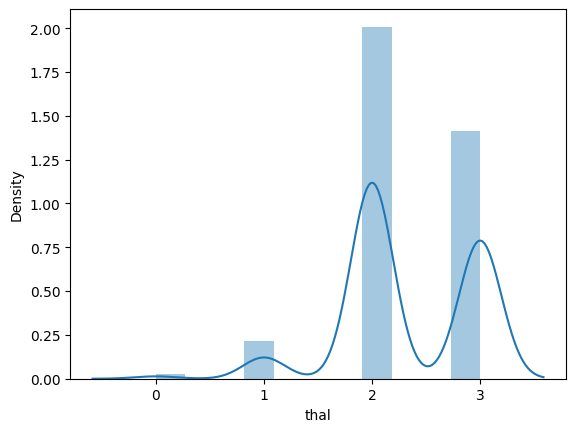

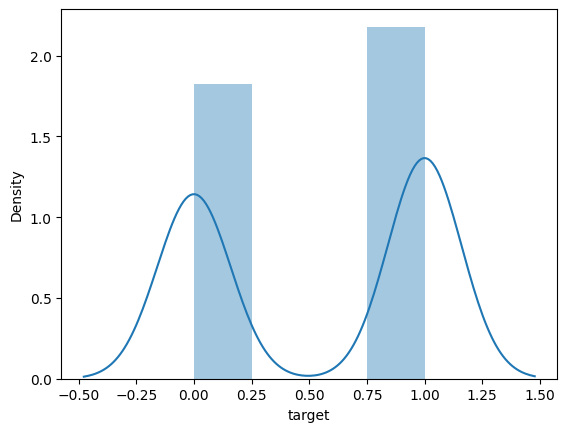

In [39]:
## Distribution
for i in numeric_cols:
    sns.distplot(df[i])
    plt.show()

In [40]:
# shuffle of datasest
df = shuffle(df , random_state=123)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0


In [41]:
df.shape

(303, 14)

In [42]:
X = df.drop(columns=["target"] , axis=1)
y = df["target"]

In [43]:
## train and test
X_train_full , X_test , y_train_full , y_test = train_test_split(X , y , random_state=123 , test_size=0.15 , shuffle=True)


In [44]:
# the shapes
print(f"X_train_full shape = {X_train_full.shape}")
print(f"X_test shape = {X_test.shape}")
print(f"y_train_full shape = {y_train_full.shape}")
print(f"y_test shape = {y_test.shape}")

X_train_full shape = (257, 13)
X_test shape = (46, 13)
y_train_full shape = (257,)
y_test shape = (46,)


In [45]:
numeric_cols = [col for col in X.columns if df[col].dtype in  ["int32" , "int64" , "float32" , "float64"]]
categorical_cols = [col for col in X.columns if df[col].dtype not in ["int32" , "int64" , "float32" , "float64"]]
    
if (numeric_cols) and (categorical_cols):
        print(f"the numeric columns is\n ==> {pd.DataFrame(numeric_cols)}")
        print(f"the categorical columns is \n==> {pd.DataFrame(categorical_cols)}")
        
elif categorical_cols:
        print(f"the categorical columns is\n ==> {pd.DataFrame(categorical_cols)}")
    
else:
        print(f"the numeric columns is\n ==> {pd.DataFrame(numeric_cols)}")

the numeric columns is
 ==>            0
0        age
1        sex
2         cp
3   trestbps
4       chol
5        fbs
6    restecg
7    thalach
8      exang
9    oldpeak
10     slope
11        ca
12      thal


In [46]:
imputer = SimpleImputer(missing_values=np.nan , strategy="mean")

imputer.fit_transform(X_train_full , y_train_full)

array([[48.,  0.,  2., ...,  2.,  0.,  2.],
       [62.,  1.,  1., ...,  1.,  1.,  3.],
       [42.,  1.,  2., ...,  2.,  0.,  2.],
       ...,
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       [62.,  1.,  0., ...,  1.,  2.,  3.],
       [50.,  1.,  0., ...,  1.,  0.,  3.]])

In [47]:
scaler = StandardScaler()

scaler.fit_transform(X_train_full , y_train_full)

array([[-0.686859  , -1.43510411,  0.99498514, ...,  0.98382824,
        -0.69166491, -0.48505149],
       [ 0.84147661,  0.69681356,  0.02269928, ..., -0.62664219,
         0.26402263,  1.15518842],
       [-1.34185997,  0.69681356,  0.99498514, ...,  0.98382824,
        -0.69166491, -0.48505149],
       ...,
       [-1.4510268 , -1.43510411,  0.02269928, ...,  0.98382824,
        -0.69166491, -0.48505149],
       [ 0.84147661,  0.69681356, -0.94958657, ..., -0.62664219,
         1.21971017,  1.15518842],
       [-0.46852534,  0.69681356, -0.94958657, ..., -0.62664219,
        -0.69166491,  1.15518842]])

## Model ML

## 3.RandomForestClassifier

In [48]:
Random = RandomForestClassifier()

In [50]:
# Define the hyperparameter grid
hyper_params = {
    "n_estimators": [i for i in range(100 ,500 ,100)],
    "max_depth": [i for i in range(3,15,3)],
    "criterion": ['entropy', 'gini', 'log_loss'],
}

# Create GridSearchCV object
random_hyper = GridSearchCV(
    estimator=Random,
    param_grid=hyper_params,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

# Fit the model
random_model = random_hyper.fit(X_train_full, y_train_full)


In [51]:
print("Best parameters : \n", random_model.best_params_)


Best parameters : 
 {'criterion': 'log_loss', 'max_depth': 3, 'n_estimators': 400}


In [52]:
Rand_sea = random_model.best_estimator_
Rand_sea

RandomForestClassifier(criterion='log_loss', max_depth=3, n_estimators=400)

In [53]:
corss_val = cross_val_score(estimator=Rand_sea ,X = X_train_full , y=y_train_full ,
                            scoring="neg_mean_squared_error" , cv=5 , n_jobs=-1)

print("Score is ==>>\n ",abs(corss_val))

print("cross val score mean is ==>> ",corss_val.mean() * -1)

Score is ==>>
  [0.21153846 0.17307692 0.15686275 0.17647059 0.07843137]
cross val score mean is ==>>  0.15927601809954753


In [54]:
cross_val_pred = cross_val_predict(estimator=Rand_sea ,X = X_train_full , y=y_train_full ,
                                  method="predict" , cv=5 , n_jobs=-1)


# Calculate mean squared error
mse = np.sqrt(mean_squared_error(y_train_full, cross_val_pred))

# Print the MSE
print(f"The mean squared error is {mse:.4f}")

The mean squared error is 0.4184


In [55]:
X_train_full.shape[1]

13

In [56]:
mylist = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
importance = random_model.best_estimator_.feature_importances_
# print(importance)
# print(mylist)
names = X_train_full.columns.tolist()
print("names" , names)
for _ in range(X_train_full.shape[1]):
    print((names[_] , importance[[_]]))

names ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
('age', array([0.05789975]))
('sex', array([0.0333445]))
('cp', array([0.16231126]))
('trestbps', array([0.03589317]))
('chol', array([0.02527025]))
('fbs', array([0.00221098]))
('restecg', array([0.00755524]))
('thalach', array([0.1048693]))
('exang', array([0.10588799]))
('oldpeak', array([0.11681767]))
('slope', array([0.07424254]))
('ca', array([0.14929835]))
('thal', array([0.124399]))


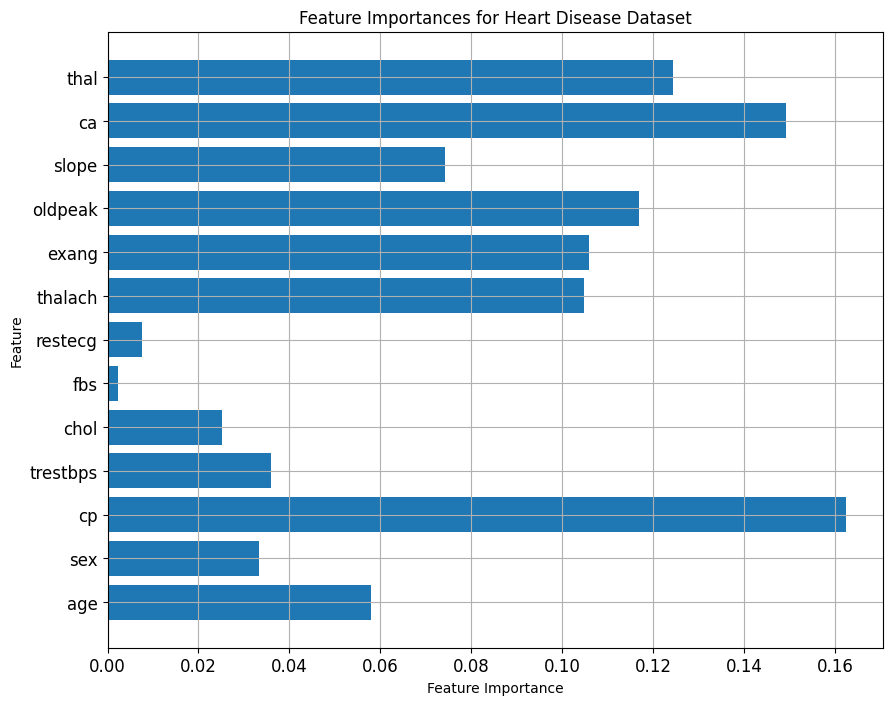

In [57]:
plt.figure(figsize=(10,8))

plt.barh(names, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances for Heart Disease Dataset")
plt.grid(True)
plt.xticks(c="k" , fontsize=12)
plt.yticks(c="k" , fontsize=12)
plt.show()


In [60]:
y_pred = Rand_sea.predict(X_test)
y_pred[:5]

array([1, 1, 0, 0, 1])

In [61]:
confusion = confusion_matrix(y_test , y_pred)
confusion

array([[18,  1],
       [ 5, 22]])

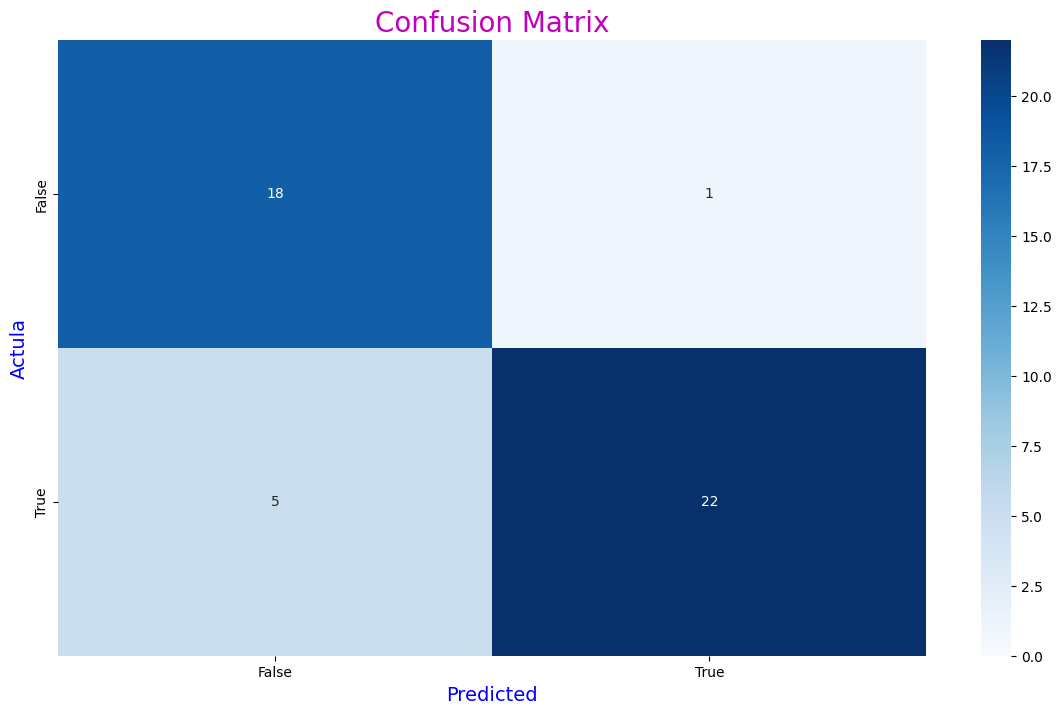

In [62]:
plt.figure(figsize=(14,8))
sns.heatmap(confusion , fmt="g" , annot=True , cbar=True , vmin=0 , cmap="Blues")
plt.xticks(ticks=np.arange(2) + 0.5 , labels=["False" , "True"])
plt.yticks(ticks=np.arange(2) + 0.5 , labels=["False" , "True"])
plt.xlabel("Predicted" , fontsize=14 , color="b")
plt.ylabel("Actula" , fontsize=14 , color="b")
plt.title("Confusion Matrix" , fontsize=20 , color="m")
plt.show()

In [63]:
print(f" some details \n {classification_report(y_test , y_pred)}")

 some details 
               precision    recall  f1-score   support

           0       0.78      0.95      0.86        19
           1       0.96      0.81      0.88        27

    accuracy                           0.87        46
   macro avg       0.87      0.88      0.87        46
weighted avg       0.88      0.87      0.87        46



## xgboost

In [64]:
xg_clas = xgp.XGBClassifier()
xg_clas.fit(X_train_full , y_train_full)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
cross_val_xgb = cross_val_score(estimator=xg_clas , X=X_train_full , y=y_train_full ,
                            cv=5 , scoring="neg_mean_squared_error" , n_jobs=-1)

 
print("Score is ==>>\n ",abs(cross_val_xgb))

print("cross val score mean is ==>> ",cross_val_xgb.mean() * -1)

Score is ==>>
  [0.21153846 0.25       0.1372549  0.23529412 0.11764706]
cross val score mean is ==>>  0.19034690799396686


In [66]:
# Make cross-validation predictions
cross_val_pred = cross_val_predict(estimator=xg_clas, X=X_train_full, y=y_train_full,
                                   cv=5, method="predict", n_jobs=-1)



# Calculate mean squared error
mse =np.sqrt(mean_squared_error(y_train_full, cross_val_pred))
# Print the MSE
print(f"The mean squared error is {mse:.4f}")

The mean squared error is 0.4366


In [67]:
len(df.columns) - 1

13

# Using Deep Learning (ANN)

In [68]:
# setting up the layers of Neural Network

model = Sequential([  
                          layers.Flatten(input_shape=(13,)),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 13)                0         
                                                                 
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 1026 (4.01 KB)
Trainable params: 1026 (4.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
# compiling the Neural Network

model.compile(optimizer="adam" ,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [70]:
# training the Neural Network
history = model.fit(X_train_full , y_train_full , epochs=100 , validation_split=0.1)
history

Epoch 1/100
8/8 [==============================] - 1s 41ms/step - loss: 34.7162 - accuracy: 0.4632 - val_loss: 11.7936 - val_accuracy: 0.4615
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 7.0978 - accuracy: 0.5671 - val_loss: 3.6951 - val_accuracy: 0.6923
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 7.0867 - accuracy: 0.5758 - val_loss: 2.8367 - val_accuracy: 0.7308
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 3.5851 - accuracy: 0.6147 - val_loss: 1.4317 - val_accuracy: 0.8462
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 3.4243 - accuracy: 0.6061 - val_loss: 0.7203 - val_accuracy: 0.8077
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 2.4871 - accuracy: 0.6017 - val_loss: 0.5593 - val_accuracy: 0.8077
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 1.8280 - accuracy: 0.6580 - val_loss: 0.3720 - val_accuracy: 0.9231
Epoch 8/100
8/8 [=======

In [71]:
# Evaluating the model

loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy is == " , accuracy)
print("loss is == " , np.round(loss , 4))

2/2 [==============================] - 0s 5ms/step - loss: 0.3023 - accuracy: 0.8696
Accuracy is ==  0.8695651888847351
loss is ==  0.3023


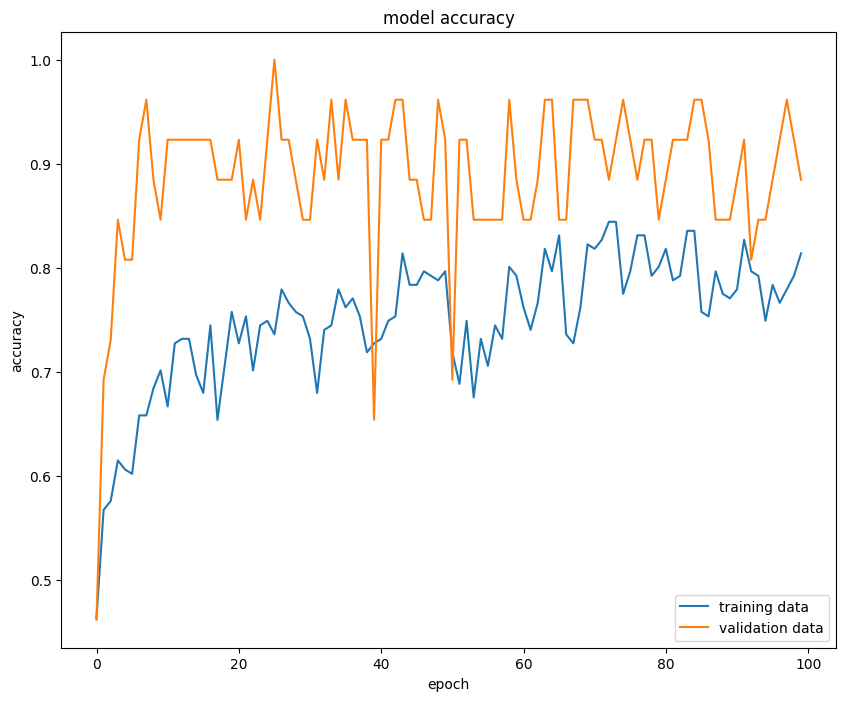

In [72]:
plt.figure(figsize=(10,8))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

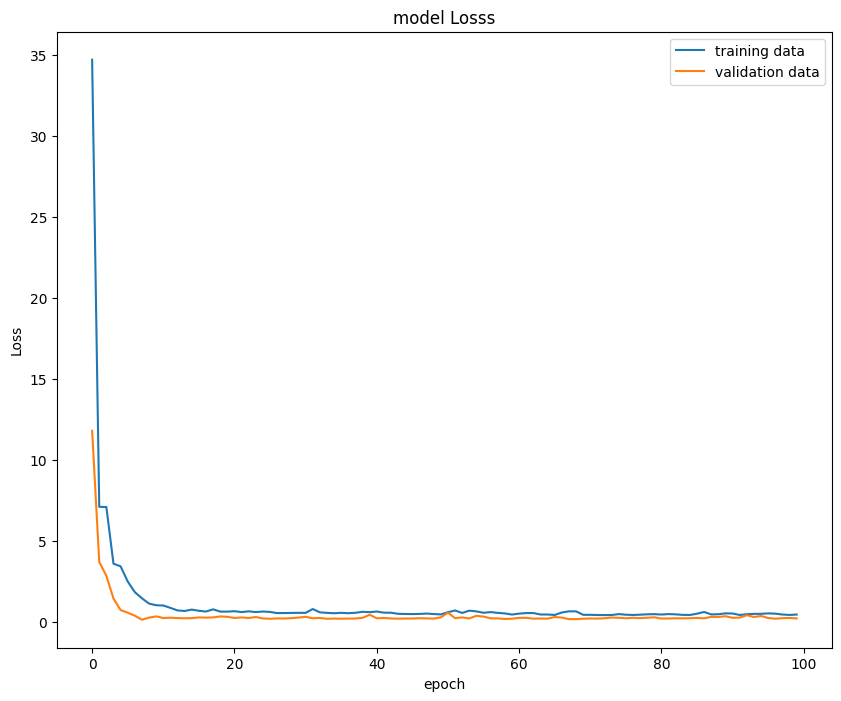

In [73]:
plt.figure(figsize=(10,8))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title('model Losss')
plt.ylabel('Loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

# End